Date: 24.11.2024.

Author: Dragoljub Perišić


# NoteBook broj 1: Klasifikacija NEO objekata u 4 kategorije pomoću mašinskog učenja

Opis:

Elementi koji se učitavaju za svako telo:
1 Argument of Perihelion -PEmaloomega -degree
2 Ascending Node -PEvelikoOmega -degree
3 Inclination -PEi -degree
4 Eccentricity -PEe -
5 Perihelion Distance -PEq -AU
6 Semimajor Axis -PEa -AU
7 Mean Anomaly -PEM -degree
8 Mean Daily Motion -PEn -degree/day
9 Aphelion Distance -PEQ -AU
10 Period -PEP -years
11 Absolute magnitude 
učitani objekti iz fajl: Set005NEOs36524.csv
se filtriraju (a < 4 AU)

potom se grafički predstavljaju:
a vs i 
a vs e

objekti se dele u 4 liste (Kategorije)
MylistOfAmor MylistOfApollo MylistOfAtens MylistOfApohele 

i posle provere preklapanja

grafički se prikazuje : a vs e za sve 4 kategorije zajedno

zatim se koristi:
Radial Basis Function Support Vector Machine (RBF SVM)

za podelu podataka u 4 kategorije.

Tela , kao i oblasti se grafički predstavljaju na poslednjem grafiku 

i na kraju se proveravaju pripadnosti klasterima za 4 date tačke



-PEH -mag



In [1]:
# -*- coding: utf-8 -*-
"""
Created on Nov 16  2024
author: Dragoljub Perisic
postupak koji generiÅ¡e fajl za primer
1. 
https://minorplanetcenter.net/db_search/
primer sadrÅ¾i objekte
upit na sajtu
NEOs (Show)
na dana 14.11.2024. 36524 objekata
sa sajta, posle upita, prebaceno u Excel
pa posle iz Excela u CSV (DOS)
file name :
Set005NEOs36524.csv
btw: isti upit na dan 16.11.2024. daje 36539 objekata
ver 0.7 -- iscrtane sve 4 kategorije drugom bojom
ver 0.8 -- sredjivanje koda
ver 0.85 -- ubacena provera preseka kategorija za asteroide .. nadjeno da atens i Apohele imaju presek
ver 0.86 -- ubacena tacna provera za sve cetiri kategorije
ver 0.87 -- pravim a vs e za sve 4 kategorije
ver 0.88 --- ugradnja granica uz ML 23.11.2024. 15:15 ... proradila prva verzija
ver 0.89 --- krece rafinacija ML granica 15:35  -- proradio KMeans
ver 0.90 --- krece Fine tuning 
ver 0.91 --- priprema za finalnu verziju - u prethodnoj verziji je sve Å¡to je ovde obrisano
ver 0.92 --- priprema za finalnu verziju - samo glavno je ovde
"""

'\nCreated on Nov 16  2024\nauthor: Dragoljub Perisic\npostupak koji generiÅ¡e fajl za primer\n1. \nhttps://minorplanetcenter.net/db_search/\nprimer sadrÅ¾i objekte\nupit na sajtu\nNEOs (Show)\nna dana 14.11.2024. 36524 objekata\nsa sajta, posle upita, prebaceno u Excel\npa posle iz Excela u CSV (DOS)\nfile name :\nSet005NEOs36524.csv\nbtw: isti upit na dan 16.11.2024. daje 36539 objekata\nver 0.7 -- iscrtane sve 4 kategorije drugom bojom\nver 0.8 -- sredjivanje koda\nver 0.85 -- ubacena provera preseka kategorija za asteroide .. nadjeno da atens i Apohele imaju presek\nver 0.86 -- ubacena tacna provera za sve cetiri kategorije\nver 0.87 -- pravim a vs e za sve 4 kategorije\nver 0.88 --- ugradnja granica uz ML 23.11.2024. 15:15 ... proradila prva verzija\nver 0.89 --- krece rafinacija ML granica 15:35  -- proradio KMeans\nver 0.90 --- krece Fine tuning \nver 0.91 --- priprema za finalnu verziju - u prethodnoj verziji je sve Å¡to je ovde obrisano\nver 0.92 --- priprema za finalnu verzij

In [2]:
import copy

In [3]:
MylistOfSB = []

In [4]:
MylistOfAmor = []
MylistOfApollo = []
MylistOfAtens = []
MylistOfApohele = []

############## klasa za putanjske elemente malog tela


<br>
NEW<br>
1  Argument of Perihelion   -PEmaloomega   -degree<br>
2  Ascending Node           -PEvelikoOmega -degree<br>
3  Inclination              -PEi           -degree<br>
4  Eccentricity             -PEe           -<br>
5  Perihelion Distance      -PEq           -AU<br>
6  Semimajor Axis           -PEa           -AU<br>
7  Mean Anomaly             -PEM           -degree<br>
8  Mean Daily Motion        -PEn           -degree/day   <br>
9  Aphelion Distance        -PEQ           -AU<br>
10 Period                   -PEP           -years<br>
11 Absolute magnitude       -PEH           -mag<br>
PEmaloomega,PEvelikoOmega,PEi,PEe,PEq,PEa,PEM,PEn,PEQ,PEP,PEH<br>


In [7]:
class SmallBody:
  def __init__(self, Name, PEmaloomega,PEvelikoOmega,PEi,PEe,PEq,PEa,PEM,PEn,PEQ,PEP,PEH):
      
      
    self.Name=Name
    self.PEmaloomega= PEmaloomega
    self.PEvelikoOmega=PEvelikoOmega
    self.PEi=PEi  
    self.PEe=PEe 
    self.PEq=PEq     
    self.PEa=PEa
    self.PEM=PEM
    self.PEn=PEn     
    self.PEQ=PEQ
    self.PEP=PEP
    self.PEH=PEH
    
   
  def SBPrint(self):
      print (str(self.PEa) +" "+ str(self.PEe) +" "+  str(self.PEi) +" "+  str(self.PEmaloomega) +" "+  
             str(self.PEvelikoOmega) +" "+str(self.PEM) +" "+str(self.PEn) +" "+  
             str(self.PEq) +" "+  str(self.PEQ) +" "+  str(self.PEP) +" "+  str(self.PEH))
  
      print (str(self.PEmaloomega) +" " +str(self.PEvelikoOmega) +str(self.PEi) +" "+ str(self.PEe) +" "+  str(self.PEi) +" "+  " "+  
             str(self.PEq) +" "+str(self.PEa) +" "+str(self.PEq) +" "+  
             str(self.PEa) +" "+  str(self.PEM) +" "
             +  str(self.PEP) +" "+  str(self.PEH))
    
      
  def SBPrintName(self):
      print (self.Name)
      

##mySmallBodTest = SmallBody("test2",10,0.2,4,5,44,53,0.2,3.1,3.4,5.6,10.2)<br>
##mySmallBodTest.SBPrint()

In [9]:
mySmallBodyTemp = SmallBody("test3",0,0,0,0,0,0,0,0,0,0,0)

In [10]:
import csv

Define a class to hold the string and 11 numbers

In [12]:
class DataRow:
    def __init__(self, label: str, numbers: list):
        self.label = label    # A string label
        self.numbers = numbers  # A list of 11 numbers
    
    def __repr__(self):
        return f"DataRow(label={self.label}, numbers={self.numbers})"

Function to read CSV and load data into instances of DataRow

In [14]:
def load_data_from_csv(file_path):
    data_rows = []
    
    with open(file_path, mode='r') as file:
        csv_reader = csv.reader(file)
        
        # Process each line in the CSV file
        for line_num, row in enumerate(csv_reader, start=1):
            if len(row) < 12:
                print(f"Line {line_num} does not contain a label and 11 numbers: {row}")
                continue
            
            try:
                # First item is the label (string), the rest should be numbers
                label = row[0]
                numbers = [float(item) for item in row[1:]]
                mySmallBodyTemp.Name=row[0]
                mySmallBodyTemp.PEmaloomega=row[1]
                mySmallBodyTemp.PEvelikoOmega=row[2]
                mySmallBodyTemp.PEi=row[3]
                mySmallBodyTemp.PEe=row[4]
                mySmallBodyTemp.PEq=row[5]
                mySmallBodyTemp.PEa=row[6]
                mySmallBodyTemp.PEM=row[7]
                mySmallBodyTemp.PEn=row[8]
                mySmallBodyTemp.PEQ=row[9]
                mySmallBodyTemp.PEP=row[10]
                mySmallBodyTemp.PEH=row[11]
                
                ####mySmallBodyTemp.SBPrintName()
                ####mySmallBodyTemp.SBPrint()
                MylistOfSB.append(SmallBody(row[0],row[1],row[2],row[3],row[4],row[5],row[6],row[7],row[8],
                                      row[9],row[10],row[11]))
                # Check that there are exactly 11 numbers
                if len(numbers) == 11:
                    data_rows.append(DataRow(label, numbers))
                else:
                    print(f"Line {line_num} does not contain exactly 11 numbers: {row}")
            except ValueError:
                print(f"Line {line_num} contains non-numeric values in the numbers section: {row}")    
    return data_rows

In [15]:
file_path = 'Set005NEOs36524.csv'

In [16]:
data = load_data_from_csv(file_path)
#### print(data)
###### Å¡tampanje imena prvog tela
####print (MylistOfSB[1].SBPrintName())
###imamo napunjenu listu iz CVS fajla

## filtriranje 

In [18]:
MylistOfSB = [obj for obj in MylistOfSB if float(obj.PEa) < 4]

###SemiMajor Axis vs inclination

In [20]:
import matplotlib.pyplot as plt300

Convert the data into arrays

In [22]:
xs = [obj.PEa for obj in MylistOfSB]
resX = [float(ele) for ele in xs]
ys = [obj.PEi for obj in MylistOfSB]
resY = [float(ele) for ele in ys]

Add labels and title

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


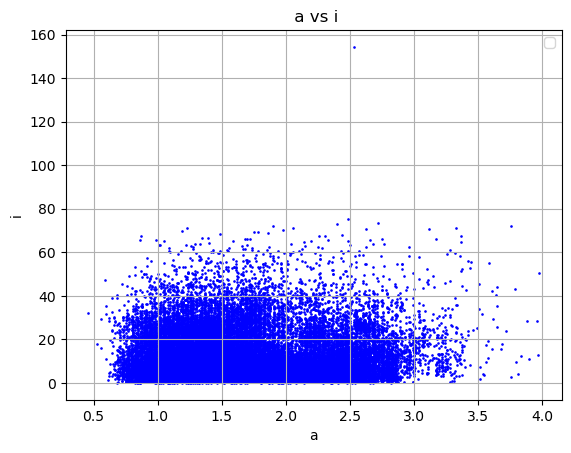

In [24]:
plt300.xlabel("a")
plt300.ylabel("i")
plt300.title(" a vs i")
plt300.legend()
# Plot the data points
plt300.scatter(resX, resY, s=0.8, color='blue', label='Data points')
# Show the plot
plt300.grid(True)
plt300.show()

#### SemiMajor Axis vs eccentricity

In [26]:
import matplotlib.pyplot as plt300

Convert the data into arrays

In [28]:
xs = [obj.PEa for obj in MylistOfSB]
resX = [float(ele) for ele in xs]
ys = [obj.PEe for obj in MylistOfSB]
resY = [float(ele) for ele in ys]

Add labels and title

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


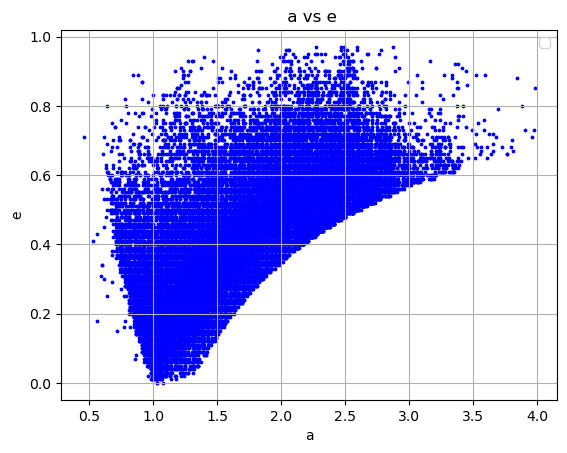

In [30]:
plt300.xlabel("a")
plt300.ylabel("e")
plt300.title(" a vs e")
plt300.legend()
# Plot the data points
plt300.scatter(resX, resY, s=3, color='blue', label='Data points')
# Show the plot
plt300.grid(True)
plt300.show()

## 4 Kategorije

In [32]:
MylistOfAmor = [copy.deepcopy(obj) for obj in MylistOfSB if float(obj.PEq) > 1.017 and float(obj.PEq) <1.3]
MylistOfApollo = [copy.deepcopy(obj) for obj in MylistOfSB if float(obj.PEq) < 1.017 and float(obj.PEa) >1]
MylistOfAtens = [copy.deepcopy(obj) for obj in MylistOfSB if float(obj.PEa) < 1 and float(obj.PEQ) >0.983]
MylistOfApohele = [copy.deepcopy(obj) for obj in MylistOfSB if float(obj.PEa) < 1 and float(obj.PEQ) < 0.983]

# provera preklapanja

In [34]:
AmorApollo=0
AmorAtens=0
AmorApohele=0
ApolloAtens=0
ApolloApohele=0
AtensApohele=0

In [35]:
AmorApollo = len([1 for obj in MylistOfSB if ( (float(obj.PEq) > 1.017 and float(obj.PEq) <1.3 and float(obj.PEq) < 1.017 and float(obj.PEa) >1)) ])
print(f"Amor Apollo presek: {AmorApollo}")

Amor Apollo presek: 0


In [36]:
AmorAtens = len([1 for obj in MylistOfSB if ( (float(obj.PEq) > 1.017 and float(obj.PEq) <1.3 and float(obj.PEa) < 1 and float(obj.PEQ) >0.983)) ])
print(f"Amor Atens presek: {AmorAtens}")

Amor Atens presek: 0


In [37]:
AmorApohele = len([1 for obj in MylistOfSB if ( (float(obj.PEq) > 1.017 and float(obj.PEq) <1.3 and float(obj.PEa) < 1 and float(obj.PEQ) < 0.983)) ])
print(f"Amor Apohele presek: {AmorApohele}")

Amor Apohele presek: 0


In [38]:
ApolloAtens = len([1 for obj in MylistOfSB if ( (float(obj.PEq) < 1.017 and float(obj.PEa) >1 and float(obj.PEa) < 1 and float(obj.PEQ) >0.983)) ])
print(f"Apollo Atens presek: {ApolloAtens}")

Apollo Atens presek: 0


In [39]:
ApolloApohele = len([1 for obj in MylistOfSB if ( (float(obj.PEq) < 1.017 and float(obj.PEa) >1 and float(obj.PEa) < 1 and float(obj.PEQ) < 0.983)) ])
print(f"Apollo Apohele presek: {ApolloApohele}")
                     
AtensApohele= len([1 for obj in MylistOfSB if ( (float(obj.PEa) < 1 and float(obj.PEQ) >0.983 and float(obj.PEa) < 1 and float(obj.PEQ) < 0.983)) ])
print(f"Atens Apohele presek: {AtensApohele}")

Apollo Apohele presek: 0
Atens Apohele presek: 0


## nema preklapanja .. kategorije su disjunktne

In [41]:
countAmor   =len(MylistOfAmor)
countApollo =len(MylistOfApollo)
countAtens  =len(MylistOfAtens)
countApohele=len(MylistOfApohele)
countPocetno=len(MylistOfSB)
countUkupno=countAmor+countApollo+countAtens+countApohele

In [42]:
print ("Pocetni broj NEO tela: "+ str(countPocetno))
print ("Ukupno posle filtracije (a<4 AU) ): "+ str(countUkupno))

Pocetni broj NEO tela: 36501
Ukupno posle filtracije (a<4 AU) ): 36280


### semimajor axis vs eccentricitya sve 4 kategorije

In [44]:
import matplotlib.pyplot as plt300

Convert the data into arrays

In [46]:
xs1 = [obj.PEa for obj in MylistOfAmor]
resX1 = [float(ele) for ele in xs1]
ys1 = [obj.PEe for obj in MylistOfAmor]
resY1 = [float(ele) for ele in ys1]

In [47]:
xs2 = [obj.PEa for obj in MylistOfApollo]
resX2 = [float(ele) for ele in xs2]
ys2 = [obj.PEe for obj in MylistOfApollo]
resY2 = [float(ele) for ele in ys2]

In [48]:
xs3 = [obj.PEa for obj in MylistOfAtens]
resX3 = [float(ele) for ele in xs3]
ys3 = [obj.PEe for obj in MylistOfAtens]
resY3 = [float(ele) for ele in ys3]

In [49]:
xs4 = [obj.PEa for obj in MylistOfApohele]
resX4 = [float(ele) for ele in xs4]
ys4 = [obj.PEe for obj in MylistOfApohele]
resY4 = [float(ele) for ele in ys4]

Add labels and title

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


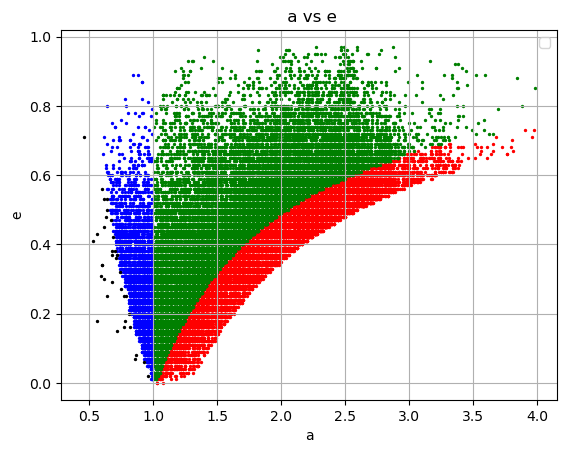

In [51]:
plt300.xlabel("a")
plt300.ylabel("e")
plt300.title(" a vs e")
plt300.legend()
# Plot the data points
##############plt300.scatter(resX, resY, s=3, color='green', label='Data points')
plt300.scatter(resX1, resY1, s=2 ,c='red', label='Amor')
plt300.scatter(resX2, resY2, s=2 ,c='green', label='Apollo')
plt300.scatter(resX3, resY3, s=2 ,c='blue', label='Atens')
plt300.scatter(resX4, resY4, s=2 ,c='black', label='Apohele')
# Show the plot
plt300.grid(True)
plt300.show()

# krece ML  Classification with Labels

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [54]:
list1 = [(float(obj.PEa), float(obj.PEe)) for obj in MylistOfAmor]
list2 = [(float(obj.PEa), float(obj.PEe)) for obj in MylistOfApollo]
list3 = [(float(obj.PEa), float(obj.PEe)) for obj in MylistOfAtens]
list4 = [(float(obj.PEa), float(obj.PEe)) for obj in MylistOfApohele]

Combine points and create labels

In [56]:
data = np.array(list1 + list2 + list3 + list4)
labels = np.array([0] * len(list1) + [1] * len(list2) + [2] * len(list3) + [3] * len(list4))

Split into training and test sets

In [58]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.05, random_state=5)

Train a classifier (SVM with RBF kernel)

In [60]:
model = SVC(kernel='rbf', probability=True)
model.fit(X_train, y_train)

SVC(probability=True)

Plot decision boundaries

In [62]:
def plot_decision_boundaries(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    plt.show()

Visualize

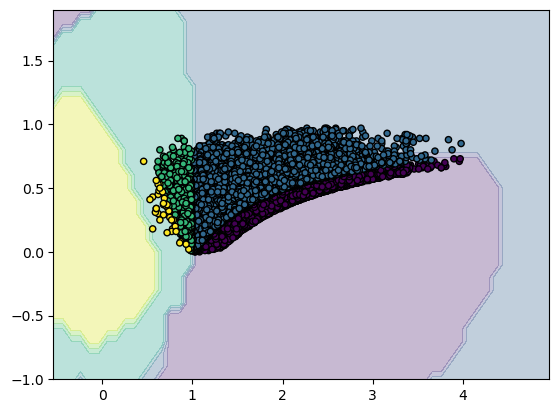

In [64]:
plot_decision_boundaries(data, labels, model)

In [65]:
test_point = np.array([[0.3, 0.3]])  # Example test point
predicted_cluster = model.predict(test_point)
print(f"The point {test_point[0]} belongs to cluster {predicted_cluster[0]}")
test_point = np.array([[0.8, 0.4]])  # Example test point
predicted_cluster = model.predict(test_point)
print(f"The point {test_point[0]} belongs to cluster {predicted_cluster[0]}")
test_point = np.array([[1.5, 0.6]])  # Example test point
predicted_cluster = model.predict(test_point)
print(f"The point {test_point[0]} belongs to cluster {predicted_cluster[0]}")
test_point = np.array([[2.0, 0.4]])  # Example test point
predicted_cluster = model.predict(test_point)
print(f"The point {test_point[0]} belongs to cluster {predicted_cluster[0]}")

The point [0.3 0.3] belongs to cluster 3
The point [0.8 0.4] belongs to cluster 2
The point [1.5 0.6] belongs to cluster 1
The point [2.  0.4] belongs to cluster 0
